In [4]:
# Reading data 
import pandas as pd
df= pd.read_csv("/Hao/Desktop/learn/Credit Risk Modeling/UCI_credit_card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Processing

In [7]:
# check null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [8]:
# check education value counts
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
# 5 and 6 in education represents 'unknown', we change them and 0 into 1 category
df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10930
3     4917
4      123
Name: EDUCATION, dtype: int64

# Marriage (1=married, 2=single, 3=others)

In [10]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

# Pay 

-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above

In [13]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

# Visualizations

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target Distribution')

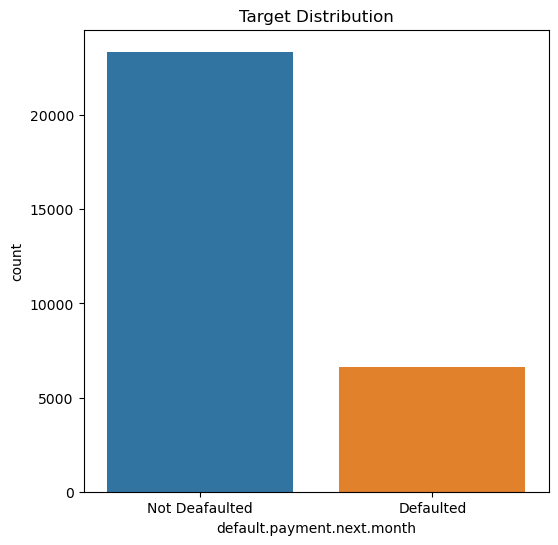

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.countplot(df['default.payment.next.month'])
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

In [17]:
df['default.payment.next.month'].value_counts()
# data is not balanced

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

Text(0.5, 1.0, 'Age distribution')

<Figure size 600x600 with 0 Axes>

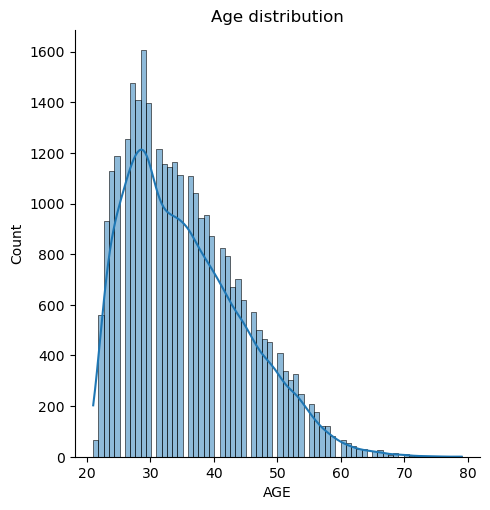

In [18]:
plt.figure(figsize=(6,6))
sns.displot(df['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender Distribution')

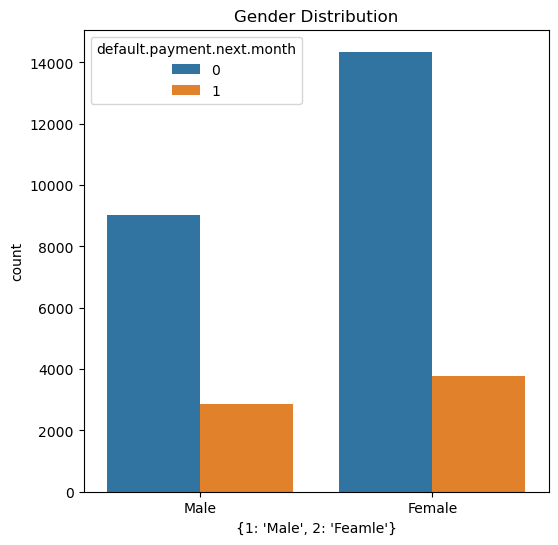

In [22]:
plt.figure(figsize=(6,6))
sns.countplot('SEX',hue='default.payment.next.month',data=df)
plt.xticks([0,1], labels=["Male", "Female"])
plt.xlabel({1:'Male',2:'Feamle'})
plt.title("Gender Distribution")

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Education Distribution')

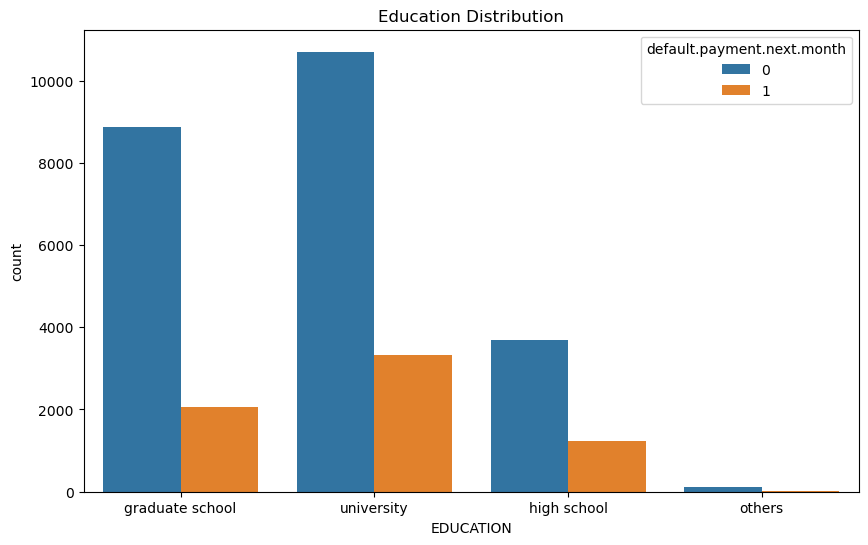

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('EDUCATION', hue='default.payment.next.month',data=df)
plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'MARRIAGE Distribution')

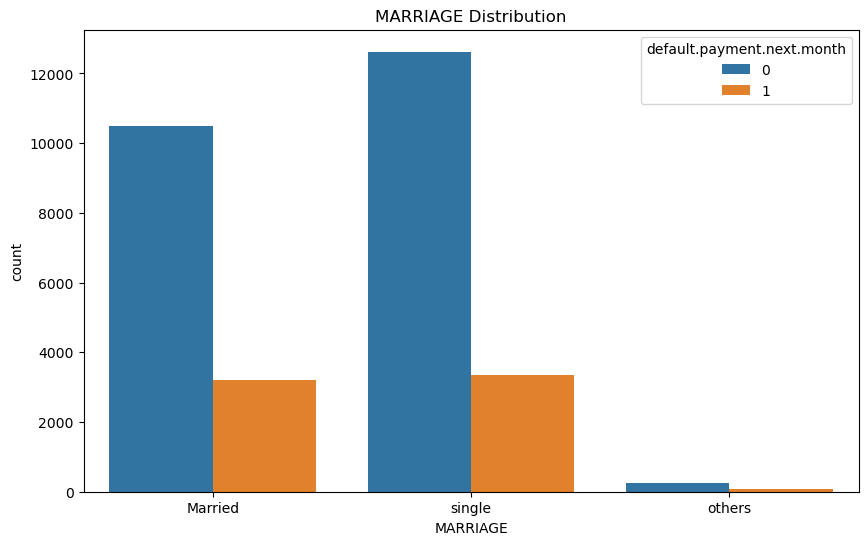

In [24]:
plt.figure(figsize=(10,6))
sns.countplot('MARRIAGE',hue='default.payment.next.month',data=df)
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")

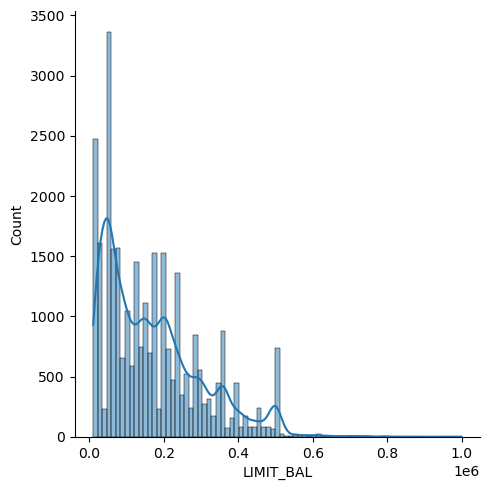

In [25]:
sns.displot(df.LIMIT_BAL, kde=True)

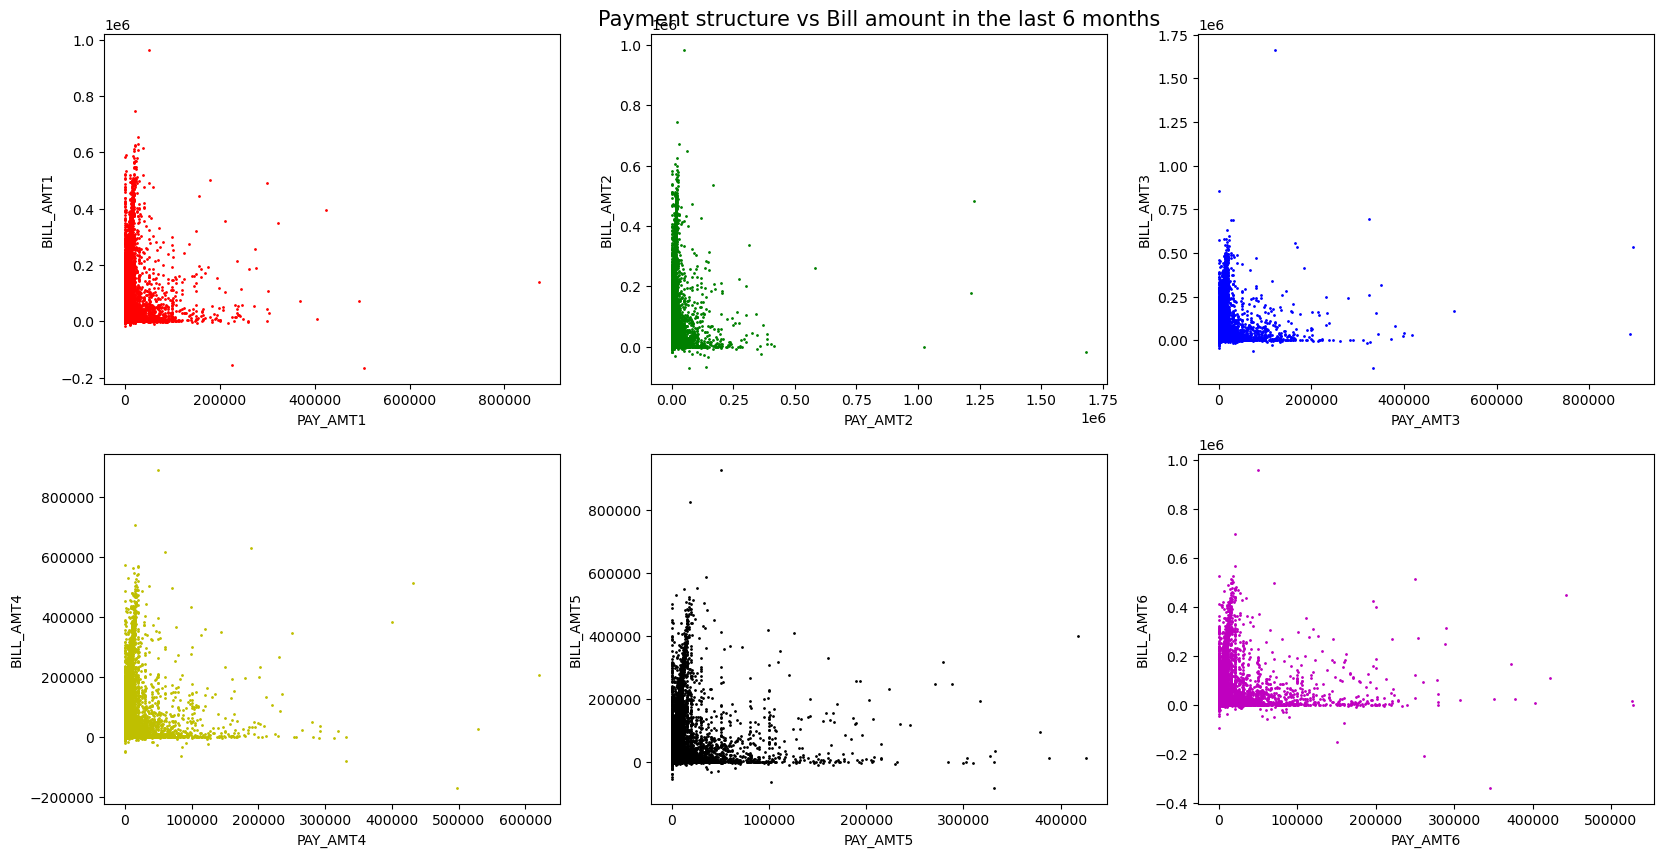

In [26]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

In [38]:
# Independnet features
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df['default.payment.next.month']
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


# Scalling features

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

# train_test split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before oversampling: ",Counter(y_train))

SMOTE= SMOTE()

X_train,y_train= SMOTE.fit_resample(X_train,y_train)

print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


# Building Models

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)
pred_logit= logit.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve
print("Accuracy:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

Accuracy: 0.6853333333333333
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


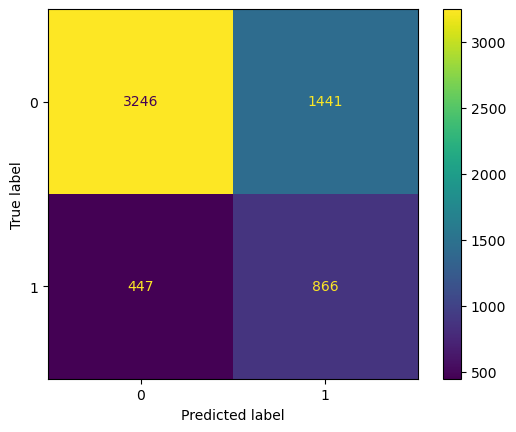

In [39]:
plot_confusion_matrix(logit, X_test, y_test)

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


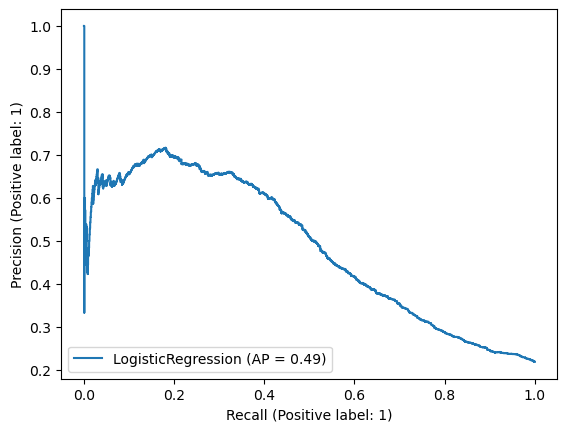

In [41]:
# roc_auc curve
plot_precision_recall_curve(logit,X_test,y_test)

In [42]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf= rf.predict(X_test)

In [43]:
print("Accuracy: ", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

Accuracy:  0.7958333333333333
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.54      0.46      0.49      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.67      0.68      6000
weighted avg       0.79      0.80      0.79      6000



/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


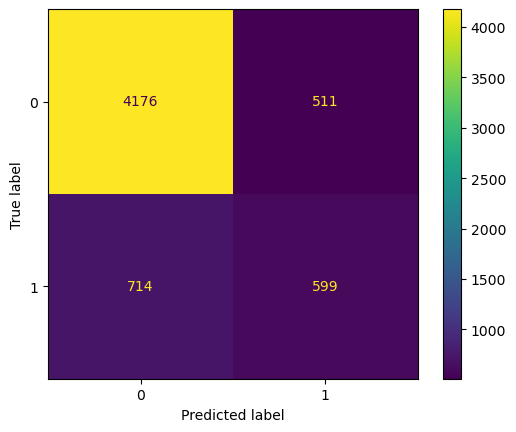

In [44]:
plot_confusion_matrix(rf, X_test, y_test)

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


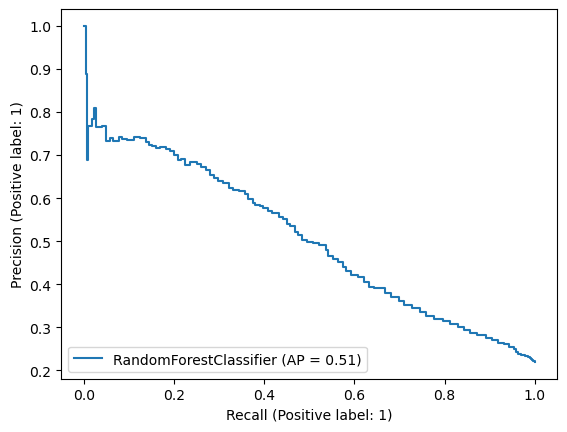

In [45]:
plot_precision_recall_curve(rf,X_test,y_test)

In [46]:
# XGBoost Classifier
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_predict= xgb_clf.predict(X_test)

In [47]:
print("Accuracy:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

Accuracy: 0.8126666666666666
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4687
           1       0.61      0.40      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


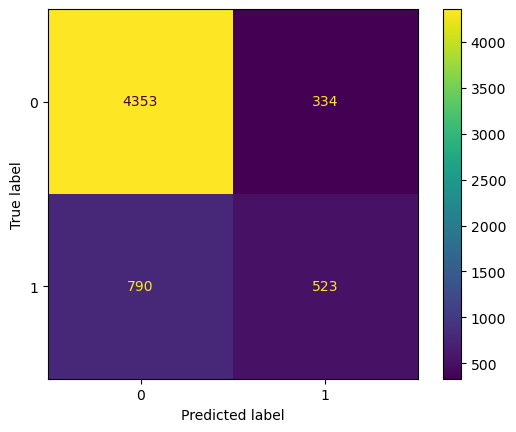

In [48]:
plot_confusion_matrix(xgb_clf, X_test, y_test)

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


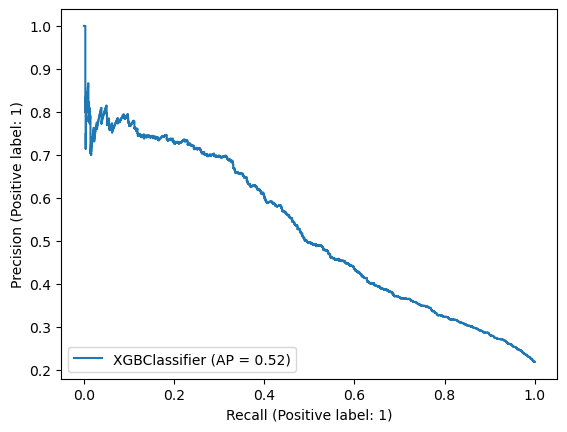

In [49]:
plot_precision_recall_curve(xgb_clf,X_test,y_test)

In [52]:
# Grid search for hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.77982701 -0.67427636  0.81016074 ... -0.23031407 -0.21955599
  -0.24399287]
 [-1.70301009 -1.05964618 -1.23432296 ... -0.24710213 -0.31413612
  -0.29338206]
 [ 0.91700543  0.09646329  0.81016074 ...  0.13117174  0.36265178
  -0.28314421]
 ...
 [-0.72436647 -1.073835   -1.23432296 ... -0.03471733 -0.31252148
  -0.24748575]
 [ 0.0774351  -0.13914343 -1.23432296 ... -0.30806256  0.10021443
  -0.27268762]
 [-0.43270666 -0.90549825 -1.23432296 ... -0.24422965 -0.24843915
  -0.20951727]] loaded from the file /var/folders/zt/hhvgl9sd4cn1zccq7pn35wxc0000gn/T/joblib_memmapping_folder_7417_5b3e145320614a509cee55d23c76a5ce_7008da5b021a4ba490c58309c42b310e/7417-140297554251680-631638a5a0694c6aac632ffd8e6d8a3a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenera

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [53]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [59]:
classifier=xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=0.1,
                                  learning_rate=0.1,
                                  max_depth=12,
                                  reg_lambda=10,
                                  min_child_weight=1,
                                  subsample=0.9, 
                                  colsample_bytree=0.4,
                                  use_label_encoder=False)

classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [60]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  0.8093333333333333
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.59      0.42      0.49      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



# Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/Nian/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/User

In [66]:
score

array([0.802     , 0.81033333, 0.80633333, 0.801     , 0.78766667,
       0.69733333, 0.67266667, 0.75966667, 0.81466667, 0.81866667])

In [67]:
score.mean()

0.7770333333333334